In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('netflix_titles.csv')

# Exibir as primeiras linhas do DataFrame
#print(df.head())

# Acessar informações específicas
#print(df['coluna_exemplo'])  # Acessar uma coluna
#print(df.loc[0])  # Acessar uma linha pelo índice
# Contagem de valores nulos por coluna
print("Quantidade de valores não nulos em cada colunas:\n")
print(df.info())  # Informações gerais sobre o DataFrame

Quantidade de valores não nulos em cada colunas:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [139]:
qtdTotalLinhas = len(df)
qtdLinhasComNulos = df.isnull().any(axis=1).sum()

porcetagemQtdLinhasNulos = (qtdLinhasComNulos / qtdTotalLinhas) * 100

print(f"Porcentagem de linhas com valores nulos: {porcetagemQtdLinhasNulos:.2f}%")

Porcentagem de linhas com valores nulos: 39.46%


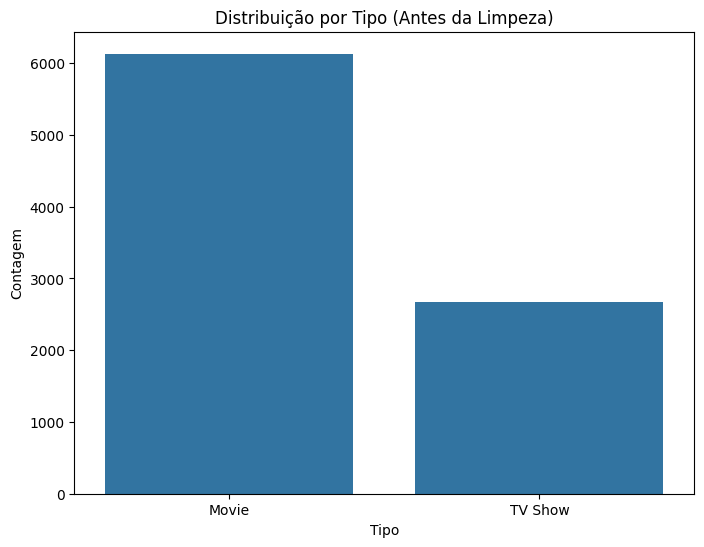

In [140]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="type")
plt.title("Distribuição por Tipo (Antes da Limpeza)")
plt.xlabel("Tipo")
plt.ylabel("Contagem")
plt.show()

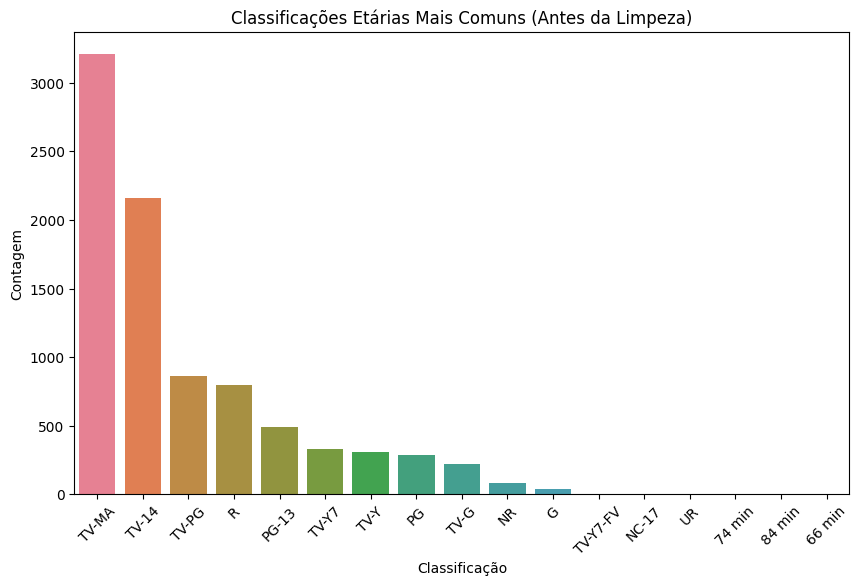

In [141]:
plt.figure(figsize=(10, 6))
ratingSemLimpeza = df['rating'].value_counts()
sns.barplot(x=ratingSemLimpeza.index, y=ratingSemLimpeza.values, hue=ratingSemLimpeza.index)
plt.title("Classificações Etárias Mais Comuns (Antes da Limpeza)")
plt.xlabel("Classificação")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.show()


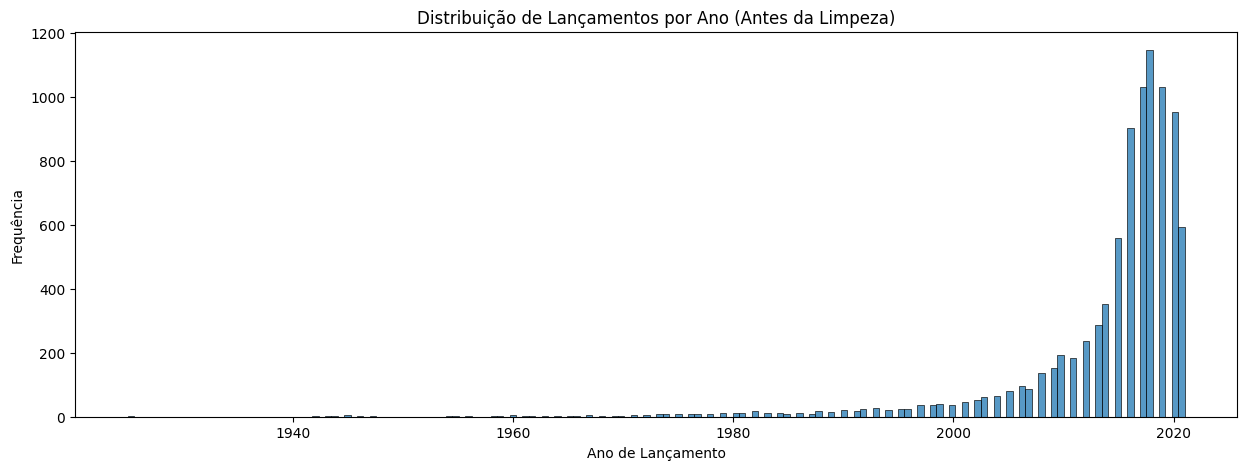

In [142]:
plt.figure(figsize=(15, 5))
sns.histplot(df['release_year'])
plt.title("Distribuição de Lançamentos por Ano (Antes da Limpeza)")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Frequência")
plt.show()


In [143]:
#Limpando o dataset
dfLimpo = df.copy()

#Substituindo valores nulos
dfLimpo['director'] = dfLimpo['director'].fillna('Desconhecido')
dfLimpo['cast'] = dfLimpo['cast'].fillna('Desconhecido')
dfLimpo['country'] = dfLimpo['country'].fillna('Desconhecido')
dfLimpo['date_added'] = dfLimpo['date_added'].fillna('Desconhecido')
dfLimpo['rating'] = dfLimpo['rating'].fillna('Desconhecido')
dfLimpo['duration'] = dfLimpo['duration'].fillna('Desconhecido')

#Limpando valores de rating
dfLimpo = dfLimpo[dfLimpo['rating'] != '66 min']
dfLimpo = dfLimpo[dfLimpo['rating'] != '74 min']
dfLimpo = dfLimpo[dfLimpo['rating'] != '84 min']

print("DataFrame Limpo \n")
print(dfLimpo.info())
print("\n")

DataFrame Limpo 

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      8804 non-null   object
 4   cast          8804 non-null   object
 5   country       8804 non-null   object
 6   date_added    8804 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8804 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.2+ KB
None




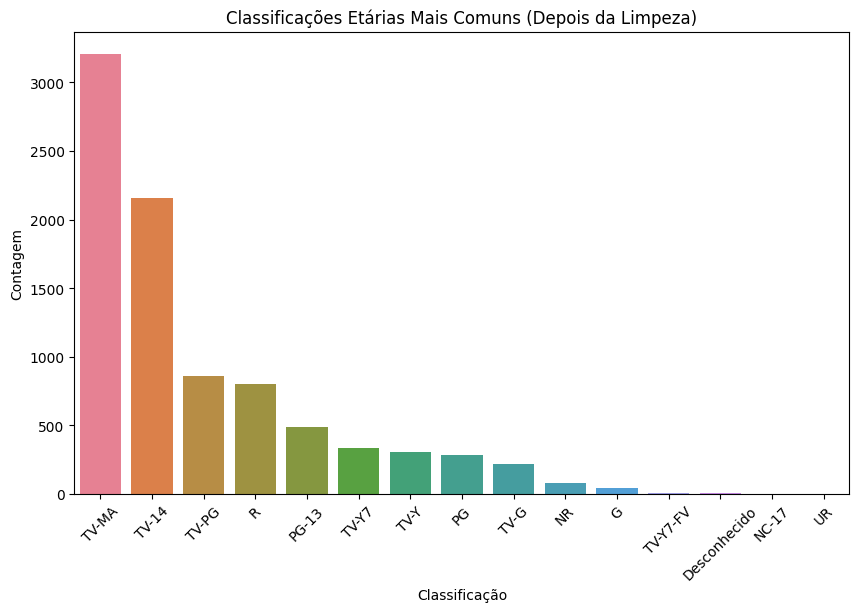

In [144]:
plt.figure(figsize=(10, 6))
ratingLimpo = dfLimpo['rating'].value_counts()
sns.barplot(x=ratingLimpo.index, y=ratingLimpo.values, hue=ratingLimpo.index)
plt.title("Classificações Etárias Mais Comuns (Depois da Limpeza)")
plt.xlabel("Classificação")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.show()


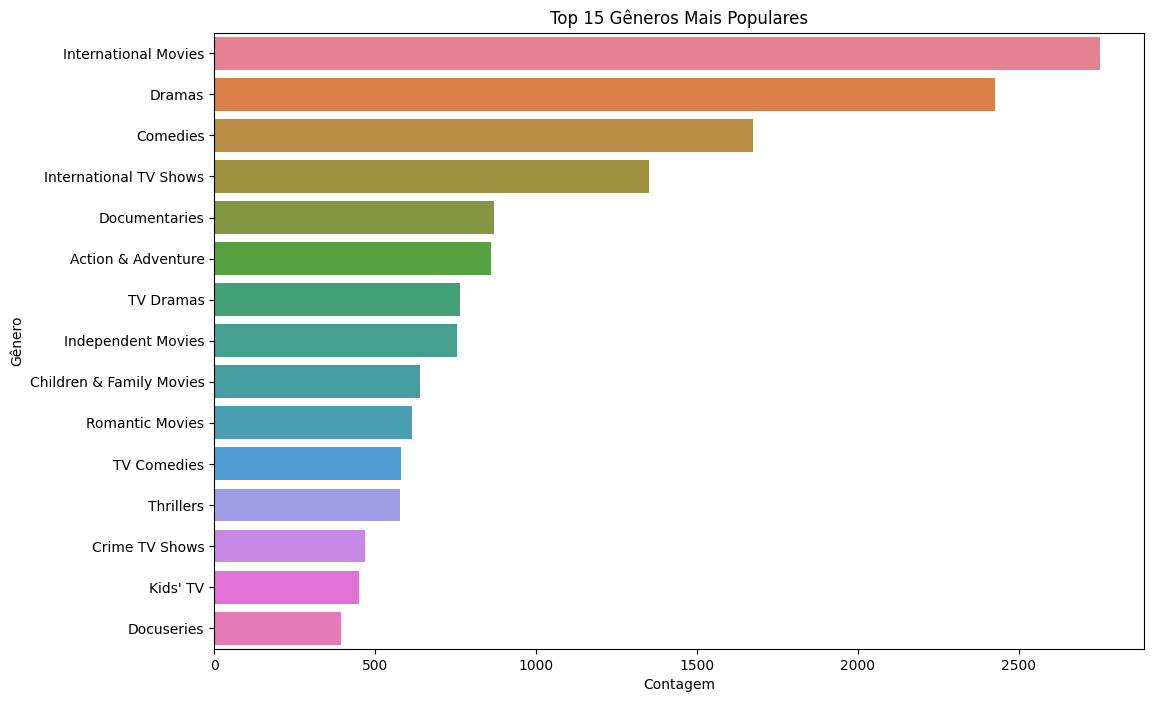

In [145]:
generos = dfLimpo['listed_in'].str.split(',', expand=True).stack().str.strip().value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=generos.values[:15], y=generos.index[:15], hue=generos.index[:15])
plt.title("Top 15 Gêneros Mais Populares")
plt.xlabel("Contagem")
plt.ylabel("Gênero")
plt.show()


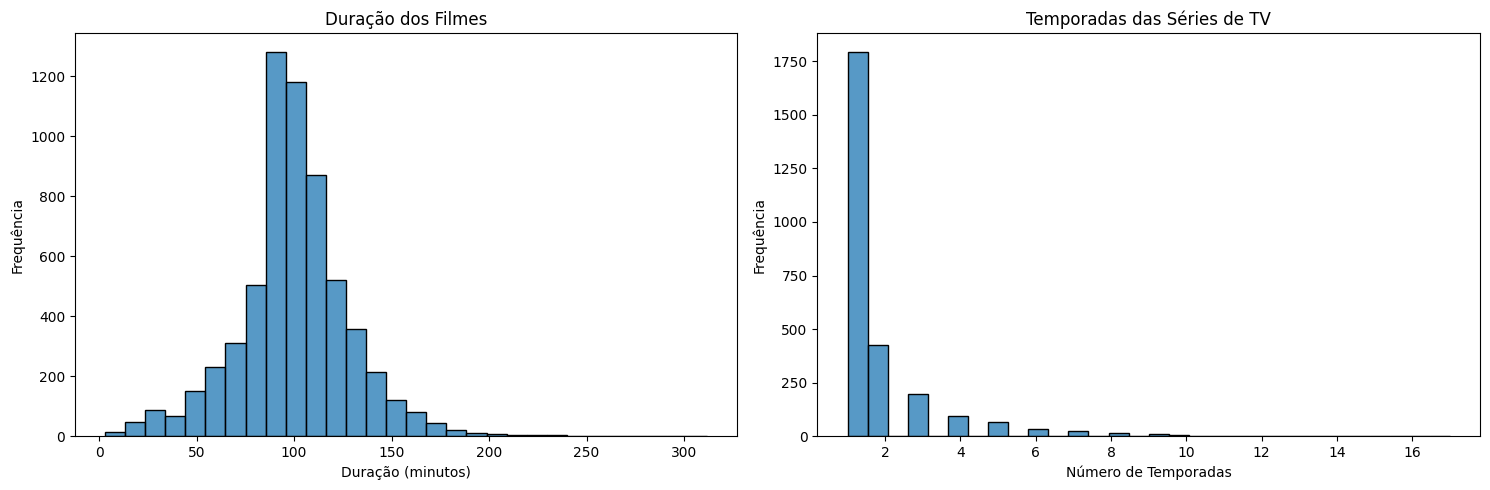

In [146]:
dfLimpo['duration_value'] = dfLimpo['duration'].str.extract('([0-9]+)').astype(int)
dfLimpo['duration_type'] = dfLimpo['duration'].str.extract('([A-Za-z]+)')

filme = dfLimpo[dfLimpo['type'] == 'Movie']
serie = dfLimpo[dfLimpo['type'] == 'TV Show']

plt.figure(figsize=(15, 5))

# Filmes
plt.subplot(1, 2, 1)
sns.histplot(filme['duration_value'], bins=30)
plt.title("Duração dos Filmes")
plt.xlabel("Duração (minutos)")
plt.ylabel("Frequência")

# Séries de TV
plt.subplot(1, 2, 2)
sns.histplot(serie['duration_value'], bins=30)
plt.title("Temporadas das Séries de TV")
plt.xlabel("Número de Temporadas")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()


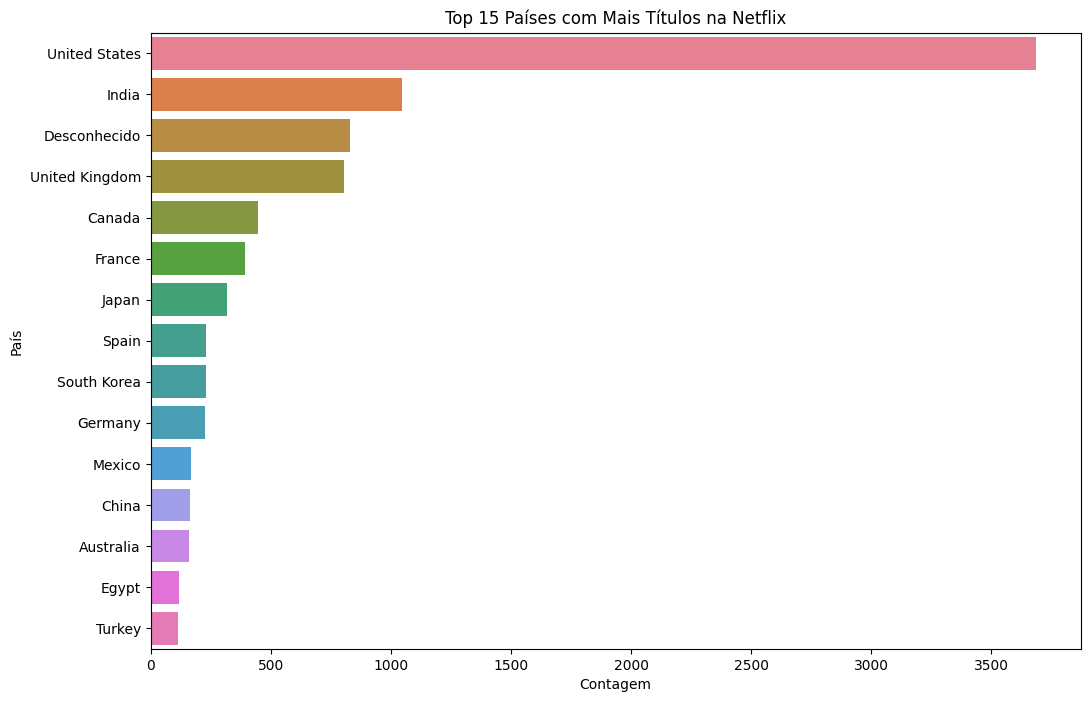

In [147]:
# Contagem de títulos por país
paises = dfLimpo['country'].str.split(',', expand=True).stack().str.strip().value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=paises.values[:15], y=paises.index[:15], hue=paises.index[:15])
plt.title("Top 15 Países com Mais Títulos na Netflix")
plt.xlabel("Contagem")
plt.ylabel("País")
plt.show()


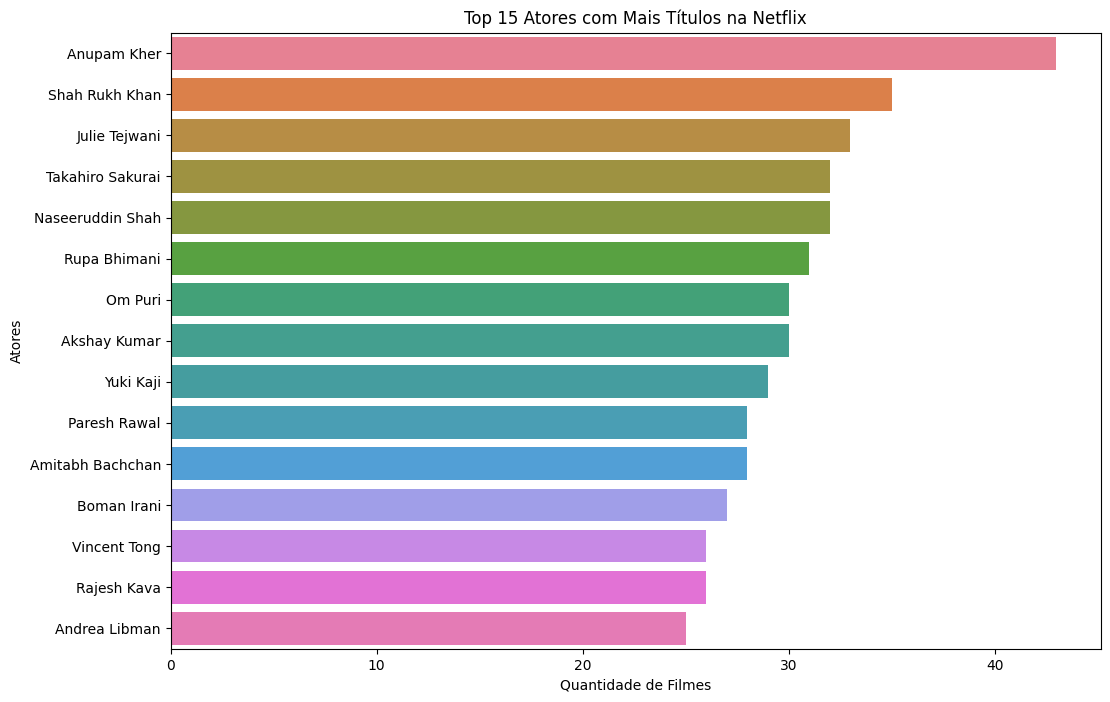

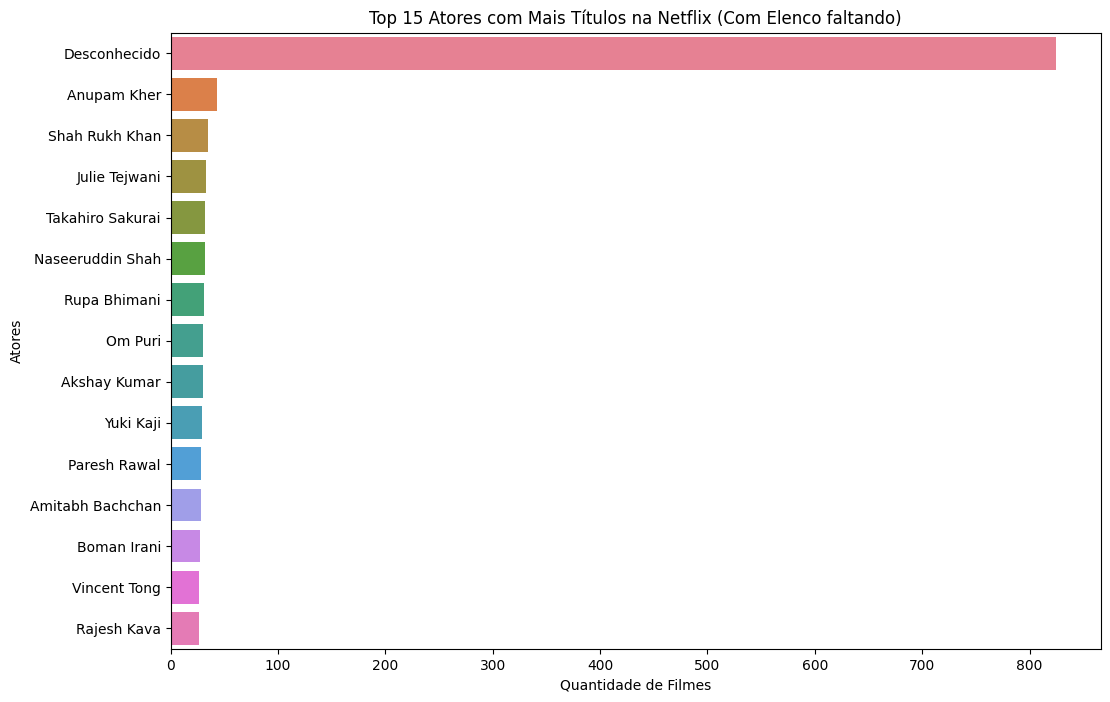

In [160]:
atores = dfLimpo['cast'].str.split(',', expand=True).stack().str.strip().value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=atores.values[1:16], y=atores.index[1:16], hue=atores.index[1:16])
plt.title("Top 15 Atores com Mais Títulos na Netflix")
plt.xlabel("Quantidade de Filmes")
plt.ylabel("Atores")
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x=atores.values[:15], y=atores.index[:15], hue=atores.index[:15])
plt.title("Top 15 Atores com Mais Títulos na Netflix (Com Elenco faltando)")
plt.xlabel("Quantidade de Filmes")
plt.ylabel("Atores")
plt.show()
